In [1]:
#Load the Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import the Dataset
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df[["Loan_ID","Loan_Amount_Term","LoanAmount"]]

,Loan_ID,Loan_Amount_Term,LoanAmount
0,LP001002,360.0,NaN
1,LP001003,360.0,128.0
2,LP001005,360.0,66.0
3,LP001006,360.0,120.0
4,LP001008,360.0,141.0
...,...,...,...
609,LP002978,360.0,71.0
610,LP002979,180.0,40.0
611,LP002983,360.0,253.0
612,LP002984,360.0,187.0


In [5]:
#Skewness & Kurtosis (to understand data distribution):
print(df['LoanAmount'].skew(), df['LoanAmount'].kurt())

2.677551679256059 10.40153349029416


In [6]:
#Outlier Detection with IQR
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['LoanAmount'] < (Q1 - 1.5 * IQR)) | (df['LoanAmount'] > (Q3 + 1.5 * IQR))]
print(outliers)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
9    LP001020    Male     Yes          1      Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
34   LP001100    Male      No         3+      Graduate            No   
54   LP001186  Female     Yes          1      Graduate           Yes   
67   LP001233    Male     Yes          1      Graduate            No   
126  LP001448     NaN     Yes         3+      Graduate            No   
130  LP001469    Male      No          0      Graduate           Yes   
135  LP001488    Male     Yes         3+      Graduate            No   
155  LP001536    Male     Yes         3+      Graduate            No   
161  LP001562    Male     Yes          0      Graduate            No   
171  LP001585     NaN     Yes         3+      Graduate            No   
177  LP001610    Male     Yes         3+      Graduate            No   
233  LP001776  Female      No          0      Graduate          

In [7]:
#EDA

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
print(df['Dependents'].unique())

['0' '1' '2' '3+' nan]


In [9]:
print(df['Gender'].unique())

['Male' 'Female' nan]


In [10]:
print(df['Property_Area'].unique())

['Urban' 'Rural' 'Semiurban']


In [11]:
print(df['Married'].unique())

['No' 'Yes' nan]


In [12]:
# Replace '+3' with '3'
df['Dependents'] = df['Dependents'].replace('+3', '3')
df['Loan_Status'] = df['Loan_Status'].replace('Y', '1')
df['Loan_Status'] = df['Loan_Status'].replace('N', '0')
df['Education'] = df['Education'].replace('Graduate', '1')
df['Education'] = df['Education'].replace('Not Graduate', '0')
df['Property_Area'] = df['Property_Area'].replace('Urban', '0')
df['Property_Area'] = df['Property_Area'].replace('Rural', '1')
df['Property_Area'] = df['Property_Area'].replace('Semiurban', '2')
df['Gender'] = df['Gender'].replace('Male', '0')
df['Gender'] = df['Gender'].replace('Female', '1')
df['Married'] = df['Married'].replace('Yes', '1')
df['Married'] = df['Married'].replace('No', '0')


# Convert the column to numeric type if it's not already
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

In [13]:
print(df[['Loan_Status','Education','Property_Area','Gender','Married']])

    Loan_Status Education Property_Area Gender Married
0             1         1             0      0       0
1             0         1             1      0       1
2             1         1             0      0       1
3             1         0             0      0       1
4             1         1             0      0       0
..          ...       ...           ...    ...     ...
609           1         1             1      1       0
610           1         1             1      0       1
611           1         1             0      0       1
612           1         1             0      0       1
613           0         1             2      1       0

[614 rows x 5 columns]


In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           66
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df.fillna(df.median(),inplace=True)

C:\Users\jaisi  chawra\AppData\Local\Temp\ipykernel_12884\1048787520.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(),inplace=True)


In [16]:
#replace the missing values

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)
df['Dependents'].fillna(df['Dependents'].median(),inplace=True)

In [17]:
df[["Loan_ID","Loan_Amount_Term","LoanAmount","CoapplicantIncome","Dependents","Gender"]]


,Loan_ID,Loan_Amount_Term,LoanAmount,CoapplicantIncome,Dependents,Gender
0,LP001002,360.0,128.0,0.0,0.0,0
1,LP001003,360.0,128.0,1508.0,1.0,0
2,LP001005,360.0,66.0,0.0,0.0,0
3,LP001006,360.0,120.0,2358.0,0.0,0
4,LP001008,360.0,141.0,0.0,0.0,0
...,...,...,...,...,...,...
609,LP002978,360.0,71.0,0.0,0.0,1
610,LP002979,180.0,40.0,0.0,0.0,0
611,LP002983,360.0,253.0,240.0,1.0,0
612,LP002984,360.0,187.0,0.0,2.0,0


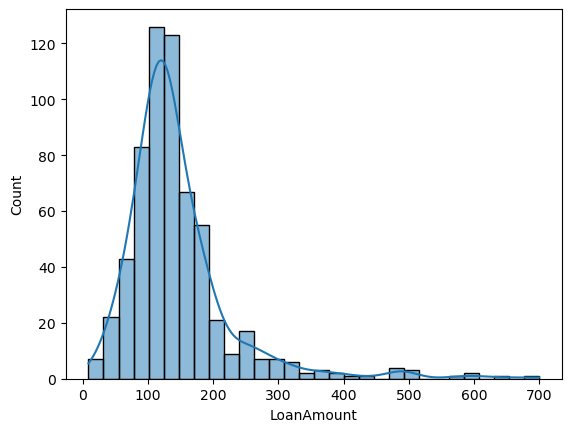

In [18]:
#Distribution of Loan Amounts
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.show()

<Axes: xlabel='Credit_History', ylabel='count'>

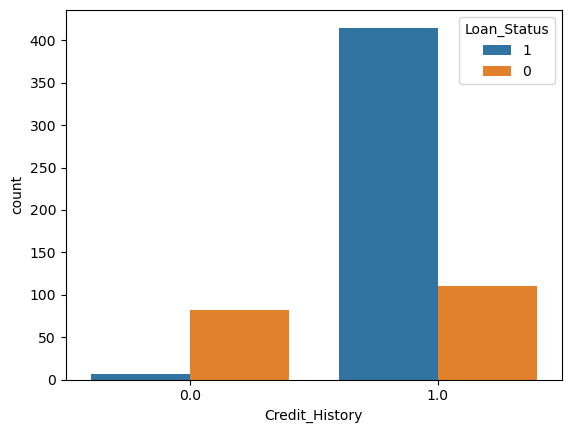

In [19]:
#Loan Approval Rate Based on Credit History
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

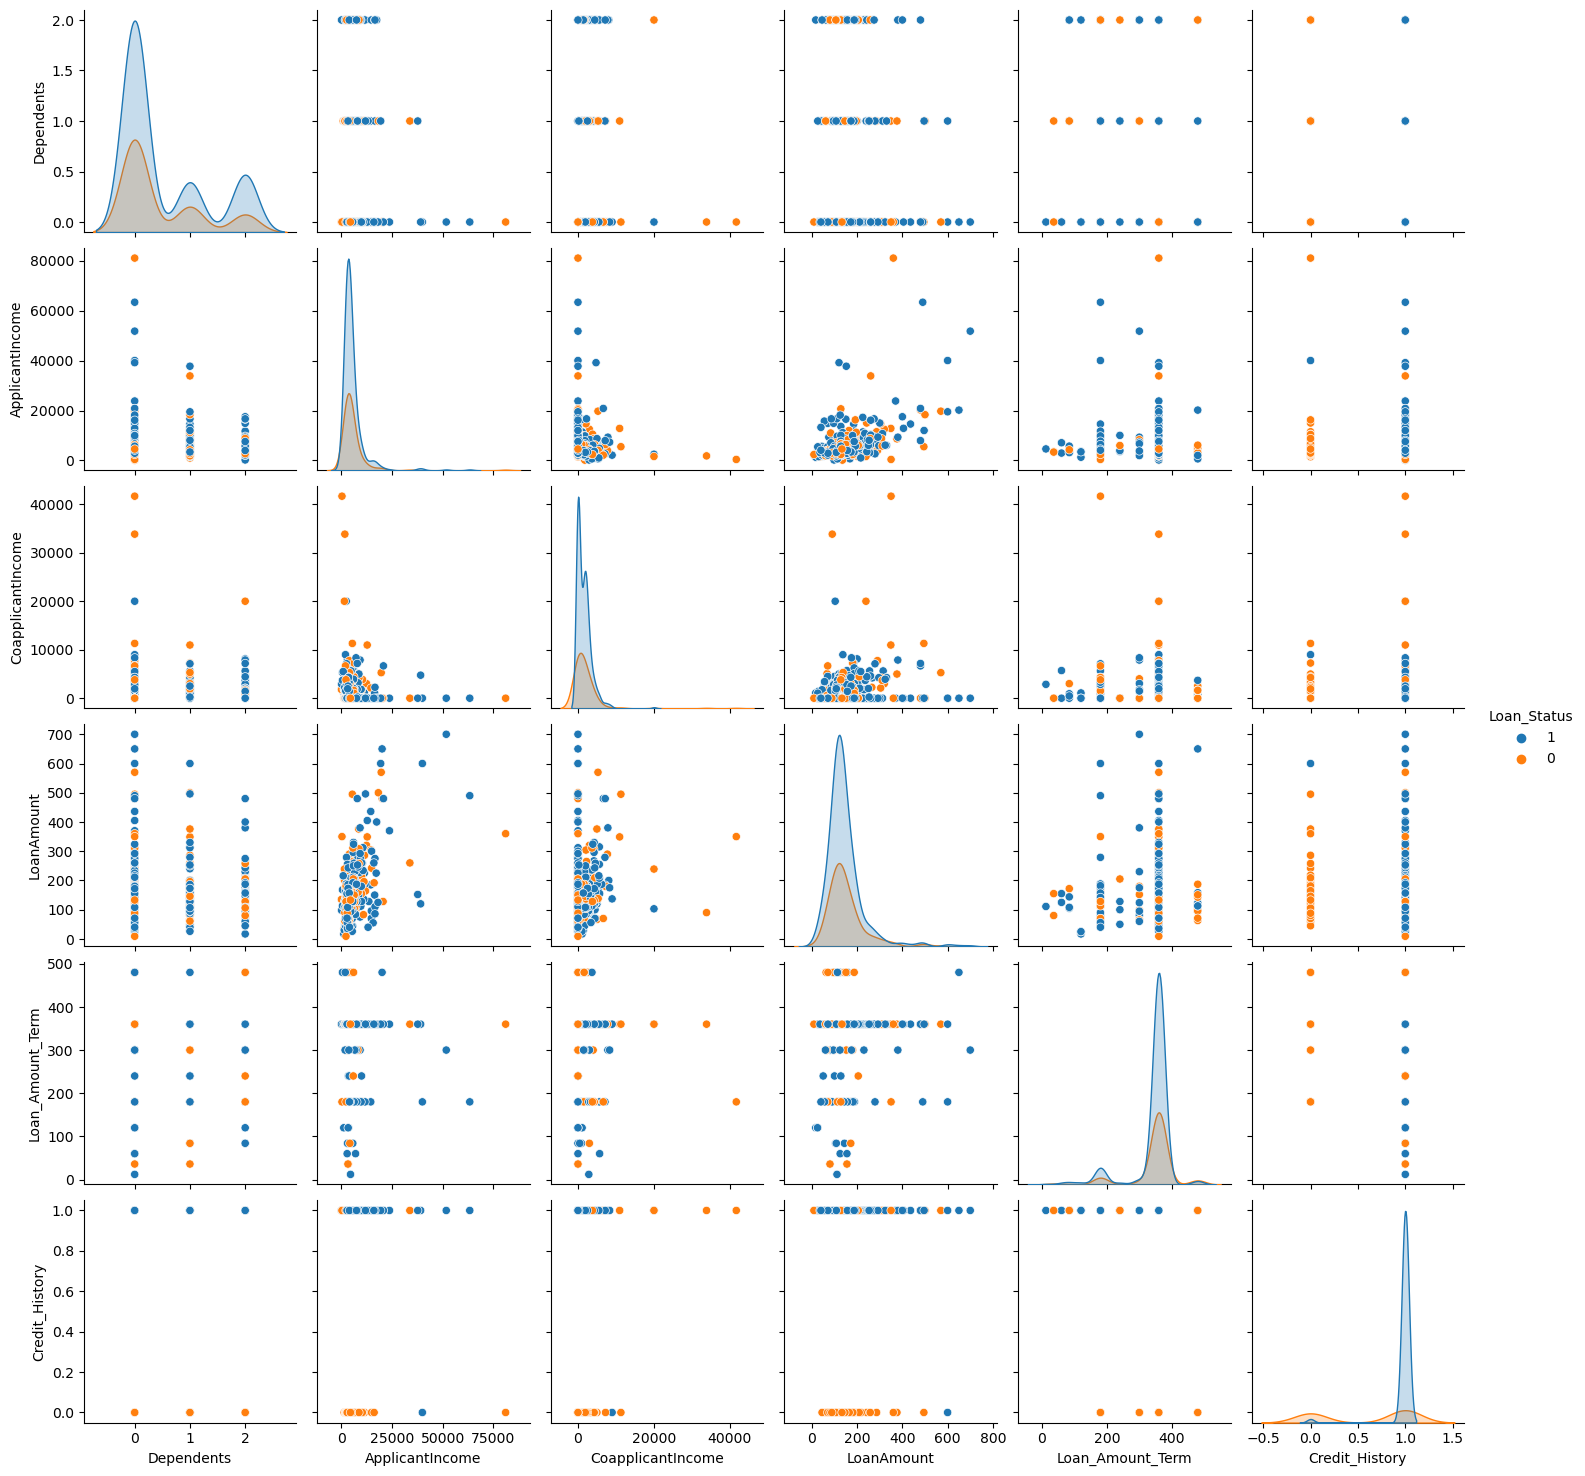

In [20]:
#Pairplot to see feature relationships
sns.pairplot(df, hue='Loan_Status')

Feature Engineering & Selection

In [31]:
#Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

In [21]:
#Split the data into independet and dependent variables
# x = df.iloc[:,[0,-5,-4]].values
# y = df.iloc[:,-1].values

x = df[["LoanAmount","Loan_Amount_Term","Credit_History","ApplicantIncome","CoapplicantIncome","Dependents","Education","Property_Area","Gender",'Married']]
y = df["Loan_Status"]

print(x,y)   

     LoanAmount  Loan_Amount_Term  Credit_History  ApplicantIncome  \
0         128.0             360.0             1.0             5849   
1         128.0             360.0             1.0             4583   
2          66.0             360.0             1.0             3000   
3         120.0             360.0             1.0             2583   
4         141.0             360.0             1.0             6000   
..          ...               ...             ...              ...   
609        71.0             360.0             1.0             2900   
610        40.0             180.0             1.0             4106   
611       253.0             360.0             1.0             8072   
612       187.0             360.0             1.0             7583   
613       133.0             360.0             0.0             4583   

     CoapplicantIncome  Dependents Education Property_Area Gender Married  
0                  0.0         0.0         1             0      0       0  
1      

In [22]:
df.shape

(614, 13)

C:\Users\jaisi  chawra\AppData\Local\Temp\ipykernel_12884\1247400275.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

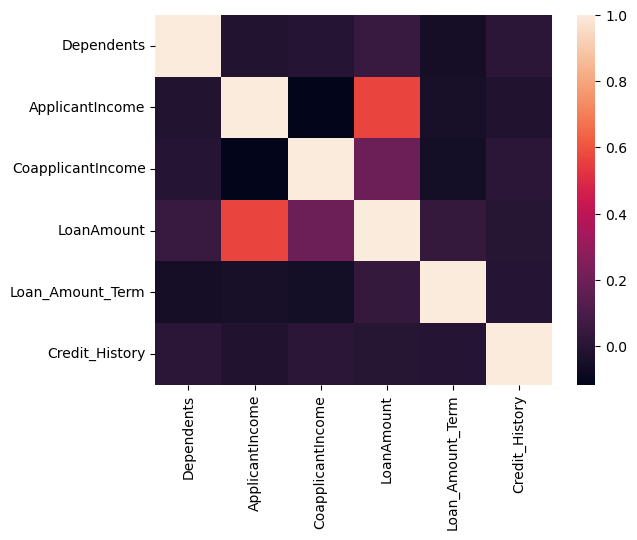

In [23]:
# Visualizing the data by drawing a correlation map
sns.heatmap(df.corr())

In [24]:
#Split the data into training and testing test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=28)

In [25]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
#Fitting KNN to training dataset

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
#classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier(p=1)

In [27]:
#Predictting over the train set and calculating the F1

from sklearn.metrics import f1_score

#test_predict = classifier.predict(x_test)
y_pred = classifier.predict(x_test)
y_pred

array(['1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0',
       '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1',
       '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1',
       '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1'],
      dtype=object)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.77%


In [29]:
#Building the Predictive System

input_data=(128.0,360.0,1.0,4583,1508.0,1.0,1.0,1.0,0,1.0)

#Change the input to annumpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for the one instance 
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0]=='0'):
    print('The person is not appicable for the loan.')
else:
    print('The person is appicable for the loan')

['0']
The person is not appicable for the loan.


In [30]:
#Building the Predictive System

input_data=(192.0,450.0,1.0,5483,1520.0,0.0,1.0,1.0,0,0.0)

#Change the input to annumpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for the one instance 
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0]=='0'):
    print('The person is not appicable for the loan.')
else:
    print('The person is appicable for the loan')

['0']
The person is not appicable for the loan.
